___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [ ]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [ ]:
!pip install --upgrade plotly
!pip install jupyter-dash

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"

#Changing the display config.... 

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
  
configure_plotly_browser_state()

In [ ]:
# from IPython.display import HTML
# import plotly.express as px

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

**Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [ ]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [ ]:
BAC = data.DataReader('BAC','stooq',start,end)
#CitiGroup
C = data.DataReader('C','stooq',start,end)

#Goldman Sachs
GS = data.DataReader('GS','stooq',start,end)

#JpMorgan Chase
JPM = data.DataReader('JPM','stooq',start,end)

#Morgan Stanley
MS = data.DataReader('MS','stooq',start,end)

#Wells Fargo
WFC = data.DataReader('WFC','stooq',start,end)

In [ ]:
MS.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,27.115,27.449,26.997,27.034,9589096
2015-12-30,27.622,27.744,27.365,27.390,5950828
2015-12-29,27.566,27.791,27.470,27.661,7517126
2015-12-28,27.502,27.502,27.151,27.338,6378111
2015-12-24,27.678,27.799,27.566,27.603,3292635


**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [ ]:
tickers = ['BAC','C','GS','MS','JPM','WFC']

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [ ]:
bank_stocks = pd.concat([BAC,C,GS,MS,JPM,WFC],axis=1,keys= tickers)

In [ ]:
bank_stocks.head()

BAC                                           C          \
              Open    High     Low   Close      Volume    Open    High   
Date                                                                     
2006-01-03  40.210  40.429  39.550  40.347  19015870.0  414.23  417.42   
2006-01-04  40.279  40.487  39.806  39.918  20721009.0  413.07  415.08   
2006-01-05  39.918  40.134  39.697  39.971  17296502.0  409.48  412.36   
2006-01-06  40.106  40.200  39.723  39.909  14696272.0  413.22  413.36   
2006-01-09  40.038  40.253  39.730  39.936  18225560.0  410.84  412.02   

                                       ...     JPM                          \
               Low   Close     Volume  ...    Open    High     Low   Close   
Date                                   ...                                   
2006-01-03  406.69  416.68  1818904.0  ...  29.228  29.617  28.844  29.495   
2006-01-04  408.71  408.98  2213232.0  ...  29.195  29.460  28.928  29.073   
2006-01-05  409.15  410.99  1342956.0  ...  29.066  29.216  28.990  29.164   
2006-01-06  407.46  410.99  1620886.0  ...  29.299  29.531  29.026  29.370   
2006-01-09  408.29  409.06  1988231.0  ...  29.266  29.884  29.266  29.847   

                           WFC                                      
                Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03  17494299.0  23.047  23.322  22.756  23.265  15105328.0  
2006-01-04  18383963.0  23.189  23.204  22.870  22.995  14904591.0  
2006-01-05  10986364.0  22.972  23.009  22.832  22.972  13891570.0  
2006-01-06  10847647.0  23.034  23.170  22.894  23.103  11523015.0  
2006-01-09  22585775.0  23.103  23.204  23.009  23.103   7705415.0  

[5 rows x 30 columns]

**Set the column name levels (this is filled out for you):**

In [ ]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Check the head of the bank_stocks dataframe.**

In [ ]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.210  40.429  39.550  40.347  19015870.0  414.23  417.42   
2006-01-04   40.279  40.487  39.806  39.918  20721009.0  413.07  415.08   
2006-01-05   39.918  40.134  39.697  39.971  17296502.0  409.48  412.36   
2006-01-06   40.106  40.200  39.723  39.909  14696272.0  413.22  413.36   
2006-01-09   40.038  40.253  39.730  39.936  18225560.0  410.84  412.02   

Bank Ticker                             ...     JPM                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   406.69  416.68  1818904.0  ...  29.228  29.617  28.844  29.495   
2006-01-04   408.71  408.98  2213232.0  ...  29.195  29.460  28.928  29.073   
2006-01-05   409.15  410.99  1342956.0  ...  29.066  29.216  28.990  29.164   
2006-01-06   407.46  410.99  1620886.0  ...  29.299  29.531  29.026  29.370   
2006-01-09   408.29  409.06  1988231.0  ...  29.266  29.884  29.266  29.847   

Bank Ticker                 WFC                                      
Stock Info       Volume    Open    High     Low   Close      Volume  
Date                                                                 
2006-01-03   17494299.0  23.047  23.322  22.756  23.265  15105328.0  
2006-01-04   18383963.0  23.189  23.204  22.870  22.995  14904591.0  
2006-01-05   10986364.0  22.972  23.009  22.832  22.972  13891570.0  
2006-01-06   10847647.0  23.034  23.170  22.894  23.103  11523015.0  
2006-01-09   22585775.0  23.103  23.204  23.009  23.103   7705415.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

**What is the max Close price for each bank's stock throughout the time period?**

In [ ]:
# for tick in tickers:
#   print(tick,   bank_stocks[tick]['Close'].max())

bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     47.047
C      476.870
GS     207.840
MS      59.691
JPM     58.185
WFC     47.722
dtype: float64

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [ ]:
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [ ]:
for tick in tickers:
  returns [tick+'_Return']=bank_stocks[tick]['Close'].pct_change()

In [ ]:
returns.head()  

,BAC_Return,C_Return,GS_Return,MS_Return,JPM_Return,WFC_Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018479,-0.013699,0.000821,-0.014308,-0.011605
2006-01-05,0.001328,0.004915,-0.000375,0.002718,0.003130,-0.001000
2006-01-06,-0.001551,0.000000,0.013988,0.001023,0.007064,0.005703
2006-01-09,0.000677,-0.004696,0.012036,0.010447,0.016241,0.000000


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

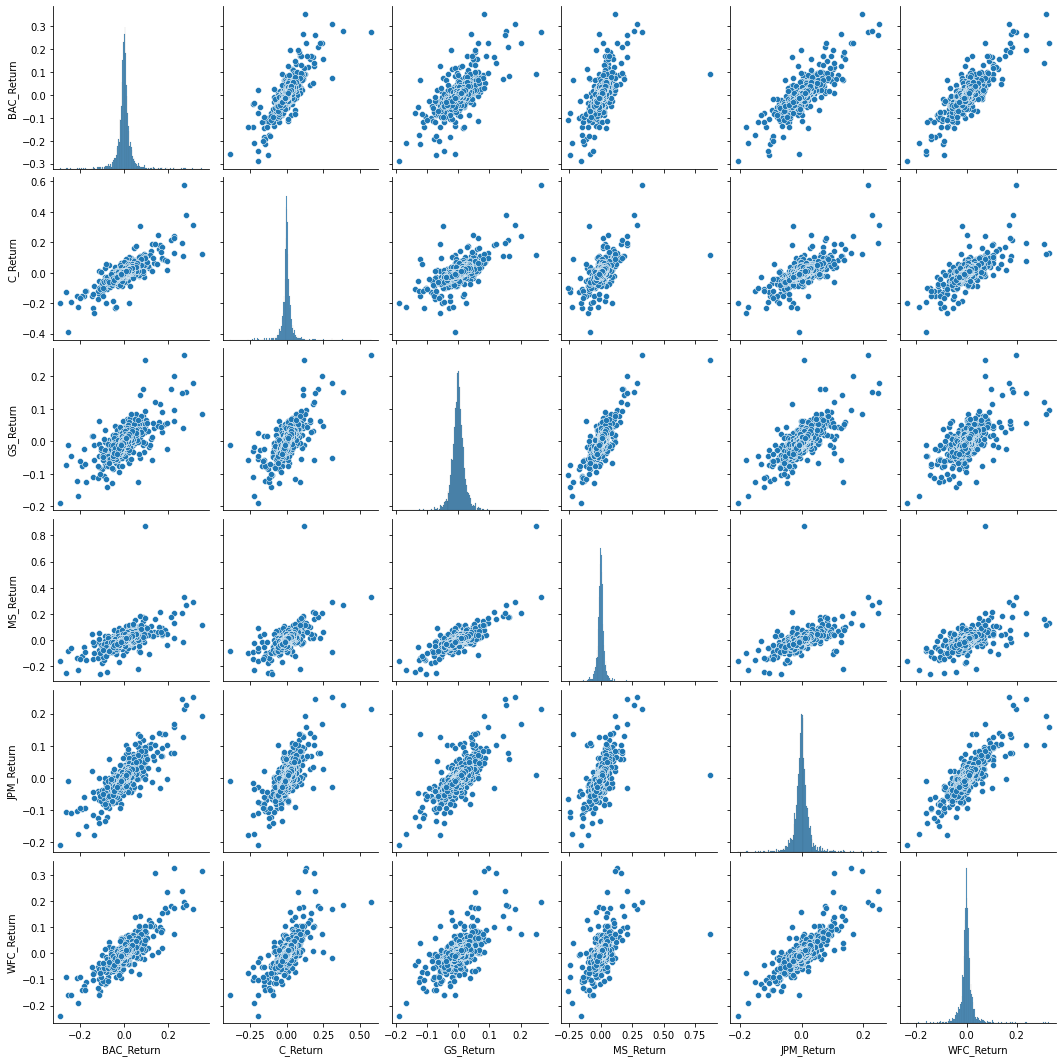

In [ ]:
sns.pairplot(returns[1:])

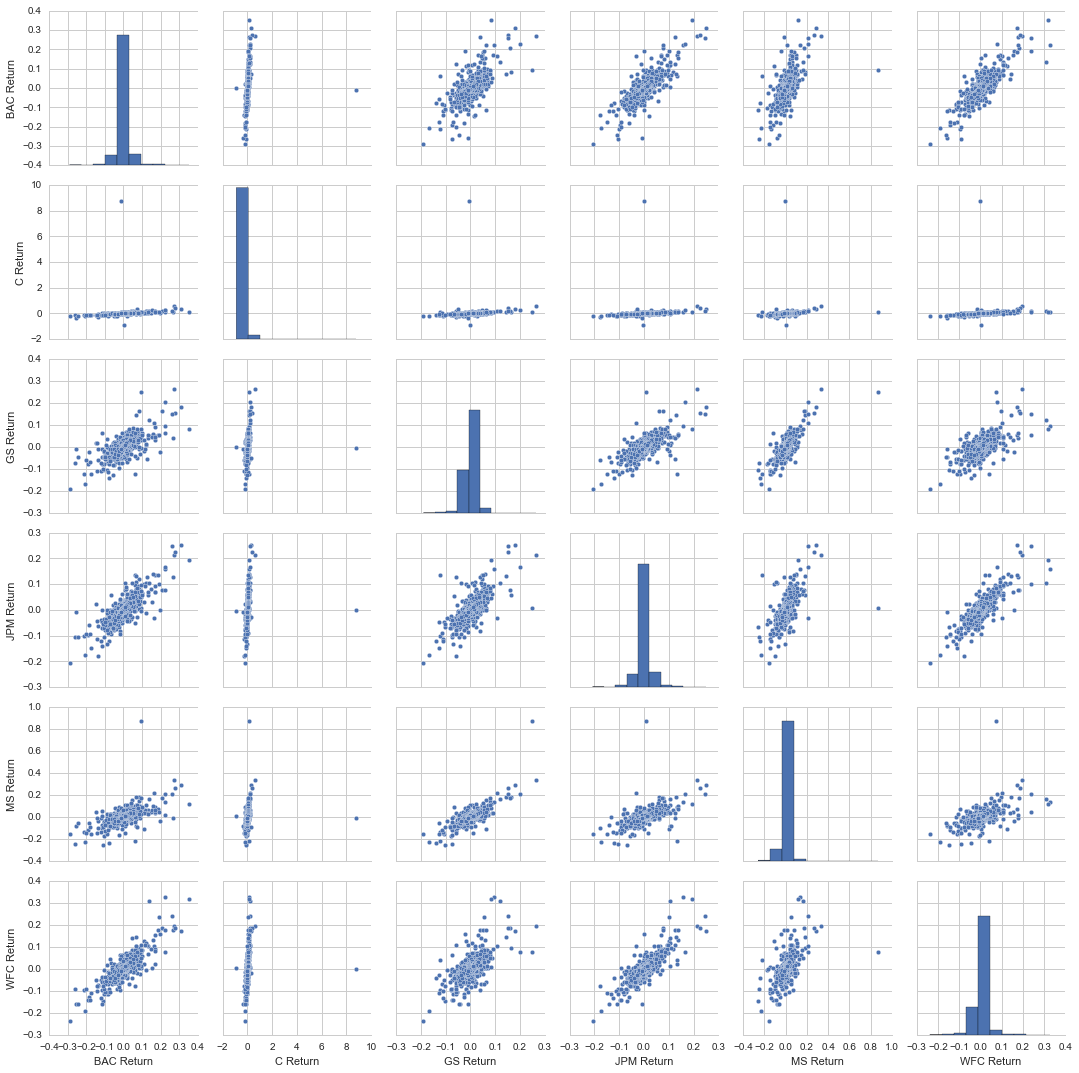

* See solution for details about Citigroup behavior....

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [ ]:
returns.idxmin()

BAC_Return   2009-01-20
C_Return     2009-02-27
GS_Return    2009-01-20
MS_Return    2008-10-09
JPM_Return   2009-01-20
WFC_Return   2009-01-20
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?**

* See Solution for details

In [ ]:
returns.idxmax()

BAC_Return   2009-04-09
C_Return     2008-11-24
GS_Return    2008-11-24
MS_Return    2008-10-13
JPM_Return   2009-01-21
WFC_Return   2008-07-16
dtype: datetime64[ns]

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [ ]:
returns.std()

BAC_Return    0.036605
C_Return      0.038615
GS_Return     0.025371
MS_Return     0.037708
JPM_Return    0.027670
WFC_Return    0.030221
dtype: float64

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [ ]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC_Return    0.016148
C_Return      0.015280
GS_Return     0.014028
MS_Return     0.016007
JPM_Return    0.013964
WFC_Return    0.012545
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

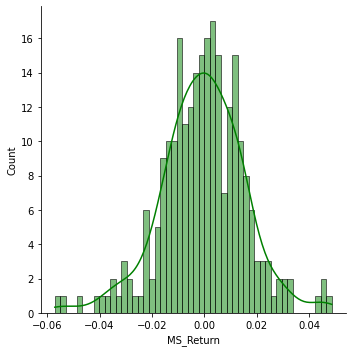

In [ ]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS_Return'],color='green',bins=50,kde=True)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



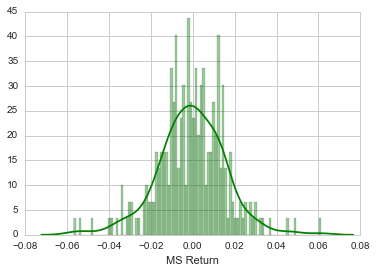

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

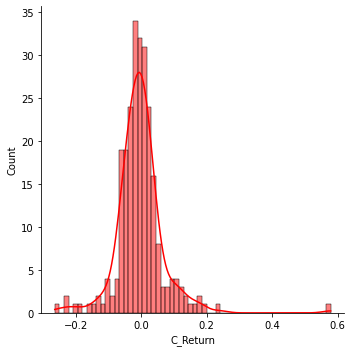

In [ ]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C_Return'],bins=60,color='red',kde=True)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



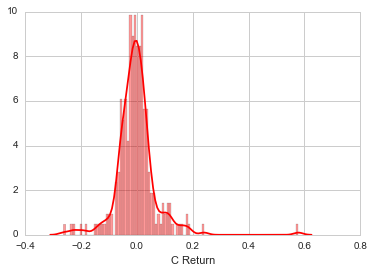

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

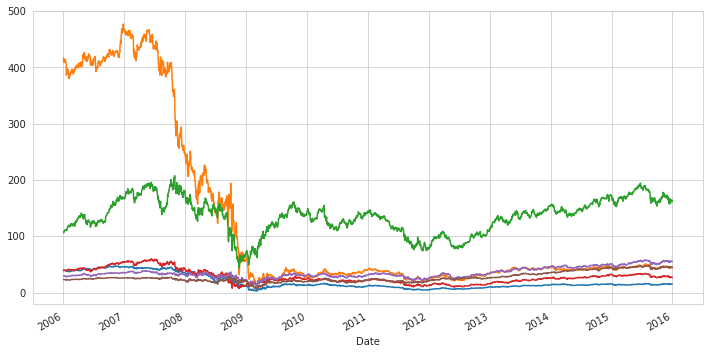

In [ ]:
for tick in tickers:
  bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,6))

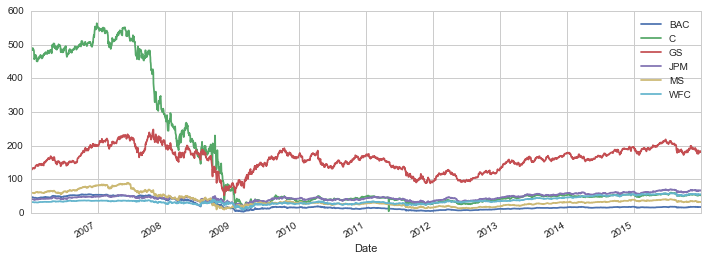

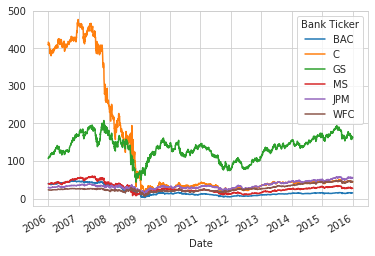

In [ ]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

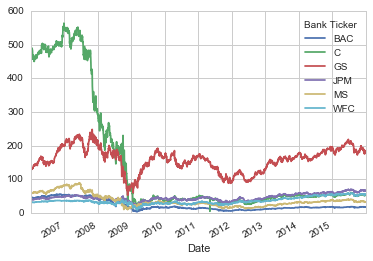

In [ ]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



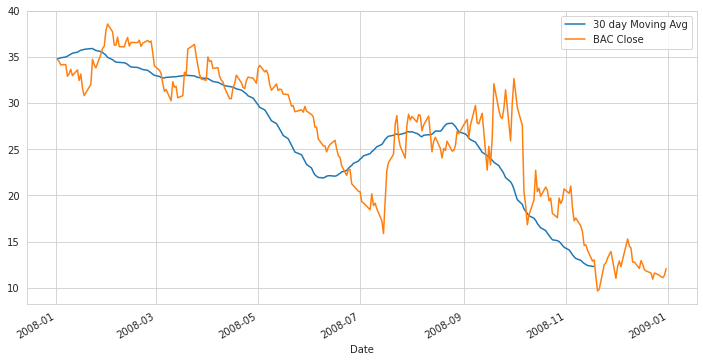

In [ ]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':"2009-01-01"].rolling(window=30).mean().plot(label = "30 day Moving Avg")
BAC['Close'].loc['2008-01-01':"2009-01-01"].plot(label="BAC Close")

plt.legend()

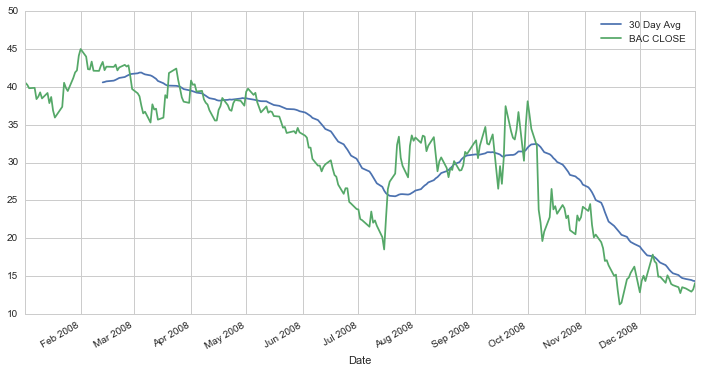

**Create a heatmap of the correlation between the stocks Close Price.**

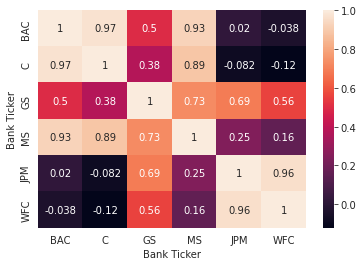

In [ ]:
relations = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
sns.heatmap(relations, annot=True)

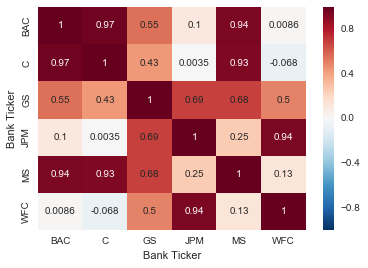

**Optional: Use seaborn's clustermap to cluster the correlations together:**

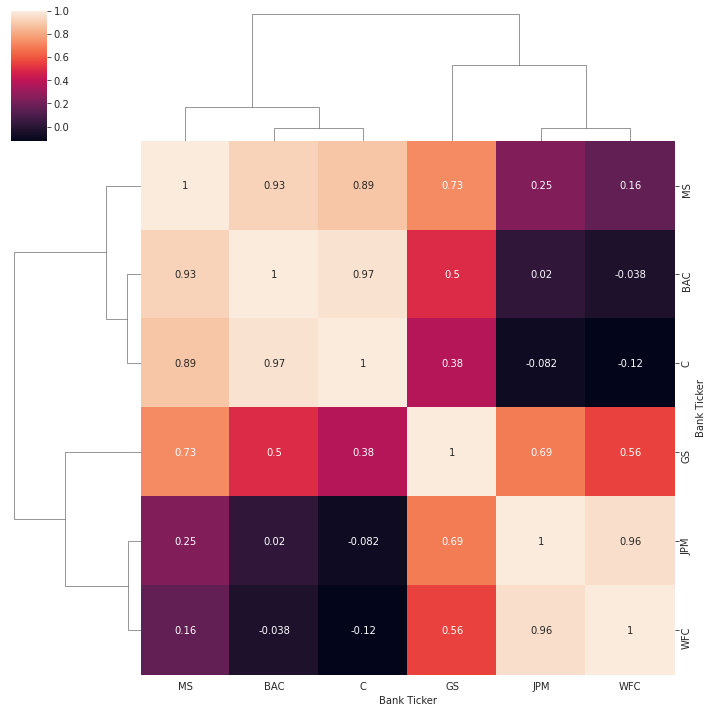

In [ ]:
sns.clustermap(relations,annot=True)

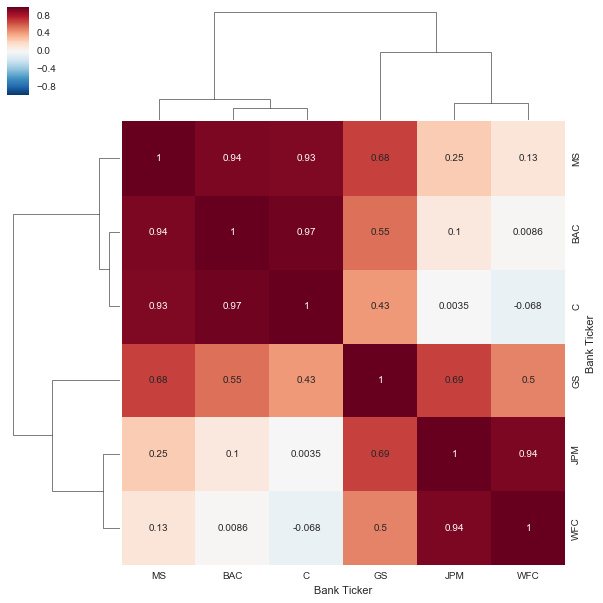

In [ ]:
relations.iplot(kind = "heatmap",colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [ ]:
bac15 = BAC[['Open','High',"Low",'Close']].loc['2015-01-01':'2016-01-01']

bac15.iplot(kind='candle')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [ ]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [ ]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.